In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import angular_separation
from astropy.io import fits
import astropy.units as u
import camb

%matplotlib inline

In [2]:
def l_res(nside):
    """Calculate the multipole moment l resolution for a given nside."""
    return int(np.pi / hp.nside2resol(nside=nside))

In [3]:
def c_theta(map, nside, angles):
    T = map.mean()


    b, l = hp.pix2ang(
        nside=nside, ipix=np.arange(hp.nside2npix(nside=nside)))
    C_theta = []
    n = len(map)
    for theta in angles:
        sum = 0
        n_pairs = 0
        for i in range(n):
            t1 = map[i]
            for j in range(n):
                sep = angular_separation(b[i], l[i], b[j], l[j])
                if np.abs(sep-theta) < 0.05:
                    t2 = map[j]
                    sum += (t1 - T)*(t2 - T)
                    n_pairs += 1
        if sum:
            C_theta.append(sum/n_pairs)
        else:
            C_theta.append(0)
            
    return np.array(C_theta)

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2009-12-16T00:00:00' /file creation date (YYYY-MM-DDThh:mm:ss UT)    
TELESCOP= 'WMAP     '          / Wilkinson Microwave Anisotropy Probe           
OBJECT  = 'ALL-SKY '           / Portion of sky given                           
EQUINOX =               2000.0 / Equinox of coordinates                         
COMMENT   This file contains the WMAP Internal Linear Combination (ILC) map     
COMMENT   based on the first 7 years of observations.                           
REFERENC= 'WMAP Explanatory 

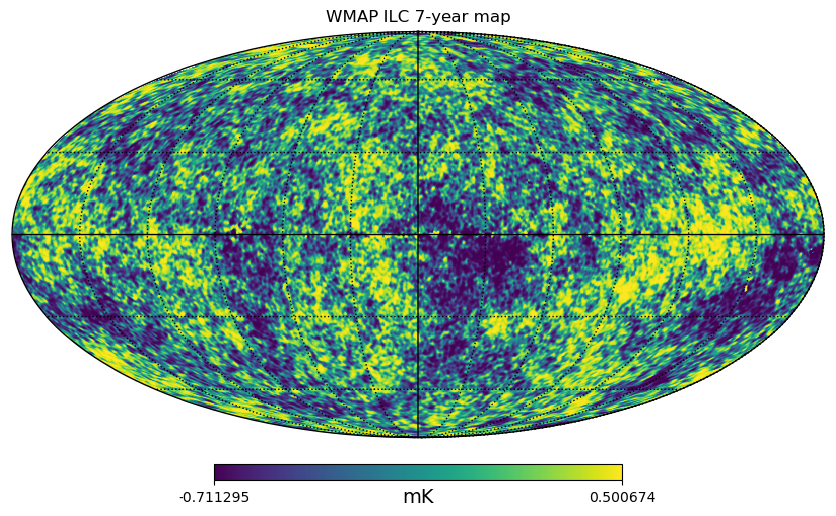

In [4]:
file = 'wmap_ilc_7yr_v4.fits'
wmap = hp.read_map(file, nest=True)
hdulist = fits.open(file)
data = hdulist[0]
hp.mollview(wmap, title='WMAP ILC 7-year map',
            unit='mK', norm='hist', nest=True)
hp.graticule()
data.header

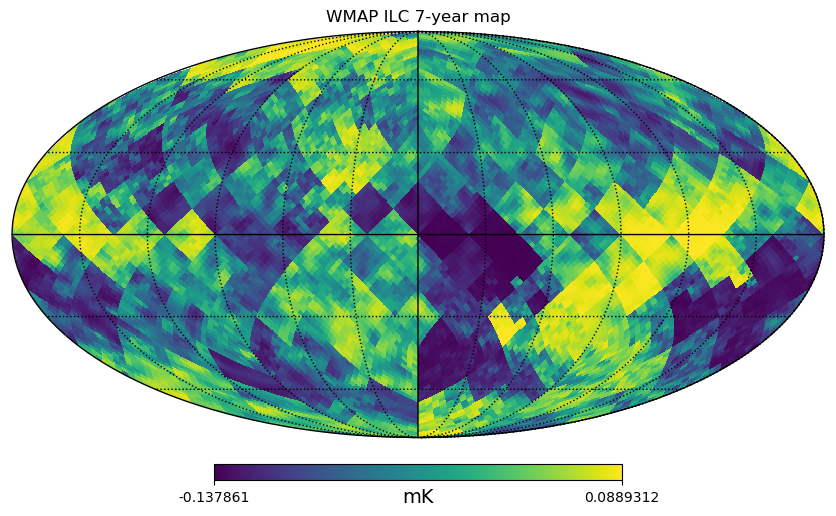

In [5]:
NSIDE = 32
wmap = hp.pixelfunc.ud_grade(map_in=wmap, nside_out=NSIDE)
hp.mollview(wmap, title='WMAP ILC 7-year map',
            unit='mK', norm='hist', nest=True)
hp.graticule()

In [6]:
import time

In [7]:
angles = np.linspace(0, np.pi, num=50)
start = time.time()
c_theta_wmap = c_theta(wmap, NSIDE, angles)
t = time.time() - start
print(f"{t:.2f}s")

52276.20s


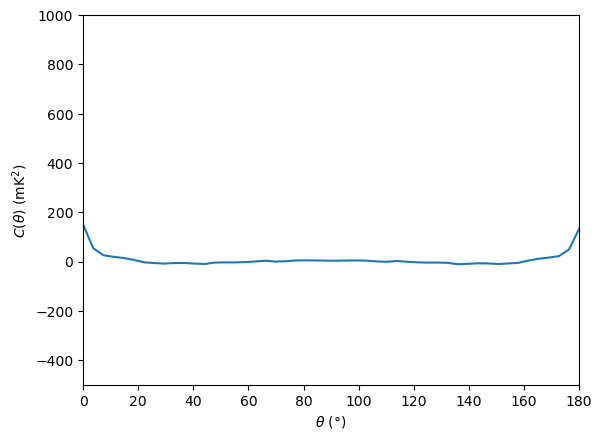

In [8]:
fig, axs = plt.subplots(1, 1)
axs.plot(np.degrees(angles), c_theta_wmap*1e6)
axs.set_xlabel(r'$\theta$ ($\degree$)')
axs.set_xlim(0, 180)
axs.set_ylabel(r'$C(\theta)$ (mK$^2$)')
axs.set_ylim(-500, 1000)
plt.show()

SIMPLE  =                    T /FITS format                                     
BITPIX  =                   16 /Dummy primary header                            
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               
RESOLUTN=                    9 /Resolution Index                                
PIXTYPE = 'HEALPIX '           /Pixel algorigthm                                
ORDERING= 'NESTED  '           /Ordering scheme                                 
NSIDE   =                  512 /Resolution Parameter                            
FIRSTPIX=                    0 /First pixel (0 based)                           
LASTPIX =              3145727 /Last pixel (0 based)                            
COMMENT This file contains a WMAP Intensity (I) Res 9 skymap for the            
COMMENT frequency band indicated by the FREQ keyword.                           
COMMENT Seven years of data 

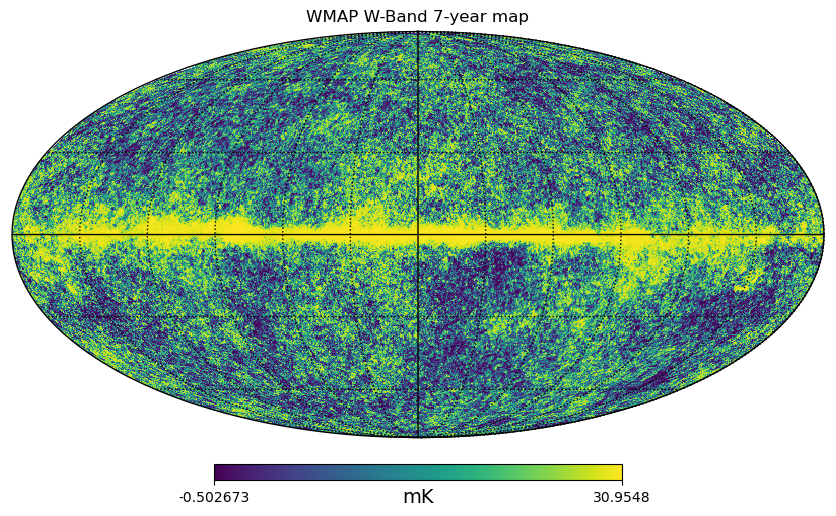

In [9]:
file = 'wmap_band_imap_r9_7yr_W_v4.fits'
wmap = hp.read_map(file, nest=True)
hdulist = fits.open(file)
data = hdulist[0]
hp.mollview(wmap, title='WMAP W-Band 7-year map',
            unit='mK', norm='hist', nest=True)
hp.graticule()
data.header

SIMPLE  =                    T /FITS format                                     
BITPIX  =                   16 /Dummy primary header                            
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               
RESOLUTN=                    9 /Resolution Index                                
PIXTYPE = 'HEALPIX '           /Pixel algorithm                                 
ORDERING= 'NESTED  '           /Ordering scheme                                 
NSIDE   =                  512 /Resolution Parameter                            
FIRSTPIX=                    0 /First pixel (0 based)                           
LASTPIX =              3145727 /Last pixel (0 based)                            
COMMENT Mask of Galactic plane and Magellanic cloud regions                     
COMMENT used in making the WMAP 7-year point source catalog                     
DATE    = '2009-10-05T00:00:

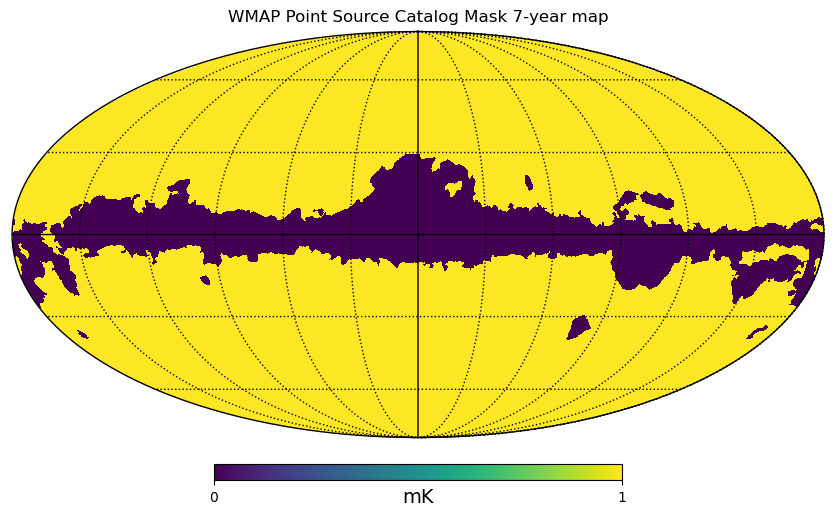

In [10]:
file = 'wmap_point_source_catalog_mask_r9_7yr_v4.fits'
mask = hp.read_map(file, nest=True)
hdulist = fits.open(file)
data = hdulist[0]
hp.mollview(mask, title='WMAP Point Source Catalog Mask 7-year map',
            unit='mK', norm='hist', nest=True)
hp.graticule()
data.header

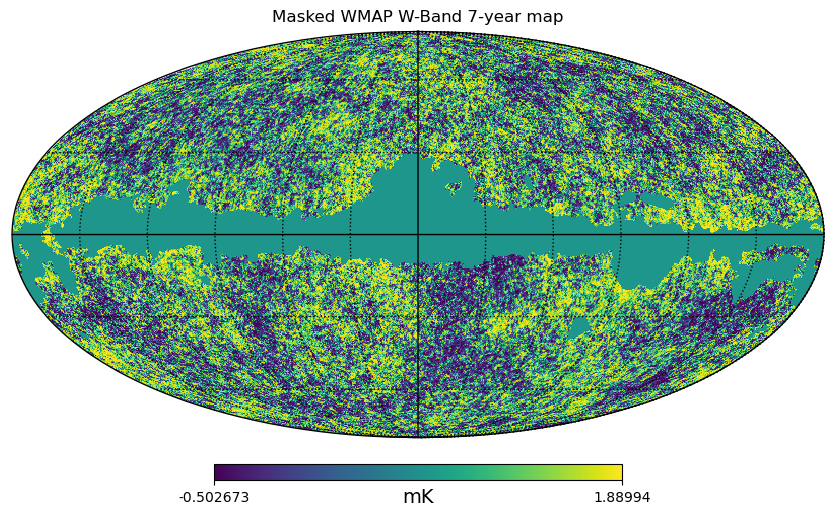

In [11]:
wmap = wmap * mask
hp.mollview(wmap, title='Masked WMAP W-Band 7-year map',
            unit='mK', norm='hist', nest=True)
hp.graticule()

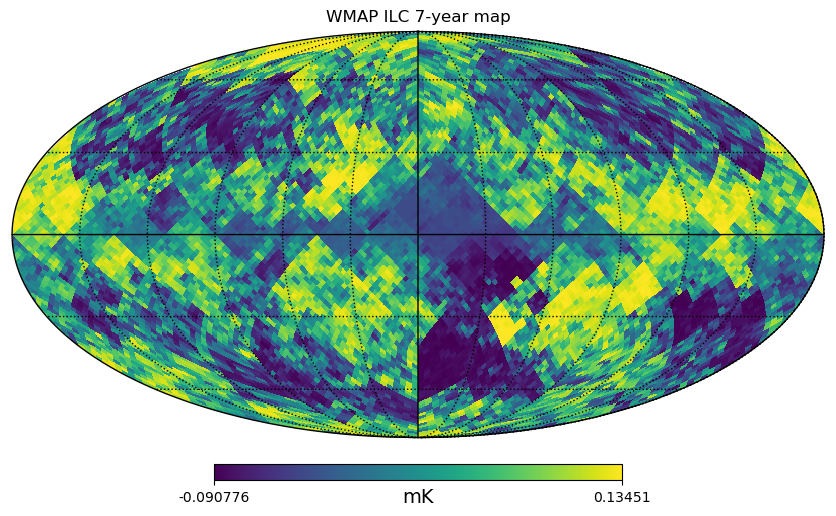

In [12]:
wmap = hp.pixelfunc.ud_grade(map_in=wmap, nside_out=NSIDE)
hp.mollview(wmap, title='WMAP ILC 7-year map',
            unit='mK', norm='hist', nest=True)
hp.graticule()

In [13]:
start = time.time()
C_theta = c_theta(wmap, NSIDE, angles)
t = time.time() - start
print(f"{t:.2f}s")

42630.57s


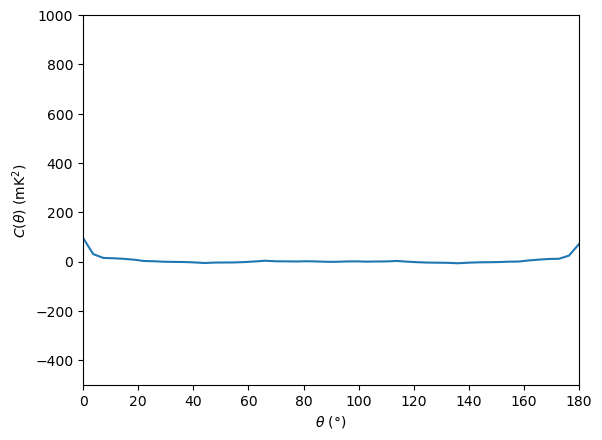

In [14]:
fig, axs = plt.subplots(1, 1)
axs.plot(np.degrees(angles), C_theta*1e6)
axs.set_xlabel(r'$\theta$ ($\degree$)')
axs.set_xlim(0, 180)
axs.set_ylabel(r'$C(\theta)$ (mK$^2$)')
axs.set_ylim(-500, 1000)
plt.show()

In [15]:
# Set up a new set of parameters for CAMB
# The defaults give one massive neutrino and helium set using BBN consistency
lmax = l_res(nside=NSIDE)
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, 
    ns=0.965, halofit_version='mead', lmax=lmax
)

# calculate results for these parameters
results = camb.get_results(pars)
# get dictionary of CAMB power spectra
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK', 
                                       raw_cl=True)

In [16]:
totCL = powers['total']*1e-6
ls = np.arange(totCL.shape[0])
ls = ls[ls >= 2]
cl = totCL[ls][:,0]
pls = np.array([np.polynomial.legendre.Legendre.basis(l)(np.cos(angles)) for l in ls])
weights = (2*ls + 1) / (4*np.pi)

C_theta_thry = np.sum(
    (weights * cl)[:, None] * pls, axis=0)

sigma_Ctheta = np.sqrt(np.sum(
    ((weights * cl)[:, None]**2) * (2.0 / (2 * ls + 1))[:, None] * pls**2, axis=0))

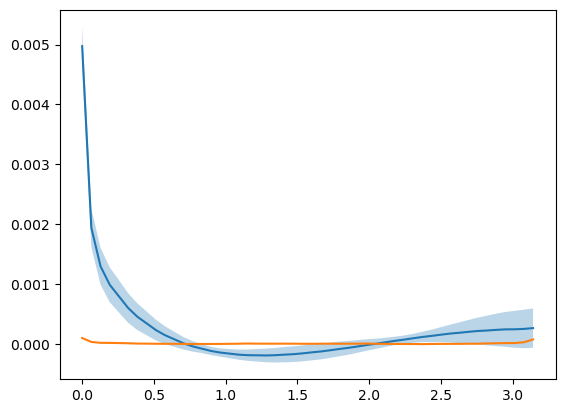

In [17]:
fig, axs = plt.subplots(1, 1)
axs.plot(angles, C_theta_thry)
axs.fill_between(angles, C_theta_thry - sigma_Ctheta, C_theta_thry + sigma_Ctheta, alpha=0.3)
axs.plot(angles, C_theta)
plt.show()